In [2]:
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from pandas.core.dtypes.common import is_numeric_dtype

# Load Data and Analysis

In [25]:
df = pd.read_excel("insurance.xlsx")

In [26]:
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [28]:
df.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [29]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Encoding with replace method

In [30]:
df1 = df.copy()

In [31]:
df1.gender = df1.gender.replace(["female", "male"], [0, 1])
df1.smoker = df1.smoker.replace(["no", "yes"], [0, 1])

In [32]:
df1.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [33]:
df1.region = df1.region.replace(['southwest', 'southeast', 'northwest', 'northeast'], [0,1,2,3])

In [34]:
df1.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


# Detecting columns that have categorical data 

In [36]:
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [38]:
edit_columns = []
for column in df.columns:
    if not is_numeric_dtype(df[column]):
        edit_columns.append(column)

In [39]:
edit_columns

['gender', 'smoker', 'region']

# Label Encoding

In [42]:
df2 = df.copy()
le = LabelEncoder()
for column in edit_columns:
    df2[column] = le.fit_transform(df2[column])

df2.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# One Hot Encoding

In [45]:
df3 = df.copy()
for column in edit_columns:
    dummy = pd.get_dummies(df3[column], columns=df3[column].unique, drop_first=True, prefix=column)
    df3.drop(column, axis=1, inplace=True)
    df3 = pd.concat([df3, dummy], axis=1)

df3.head()

,age,bmi,children,charges,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


# Ordinal Encoding

In [49]:
df4 = df.copy()
for column in edit_columns:
    ucol = df4[column].unique()
    od = OrdinalEncoder(categories=[ucol])
    encoded = od.fit_transform(df4[[column]])
    encoded = pd.DataFrame(encoded, columns=[column])
    df4.drop(column, axis=1, inplace=True)
    df4 = pd.concat([df4, encoded], axis=1)

df4.head()

,age,bmi,children,charges,gender,smoker,region
0,19,27.900,0,16884.92400,0.0,0.0,0.0
1,18,33.770,1,1725.55230,1.0,1.0,1.0
2,28,33.000,3,4449.46200,1.0,1.0,1.0
3,33,22.705,0,21984.47061,1.0,1.0,2.0
4,32,28.880,0,3866.85520,1.0,1.0,2.0


# Heatmap using Label Encoding

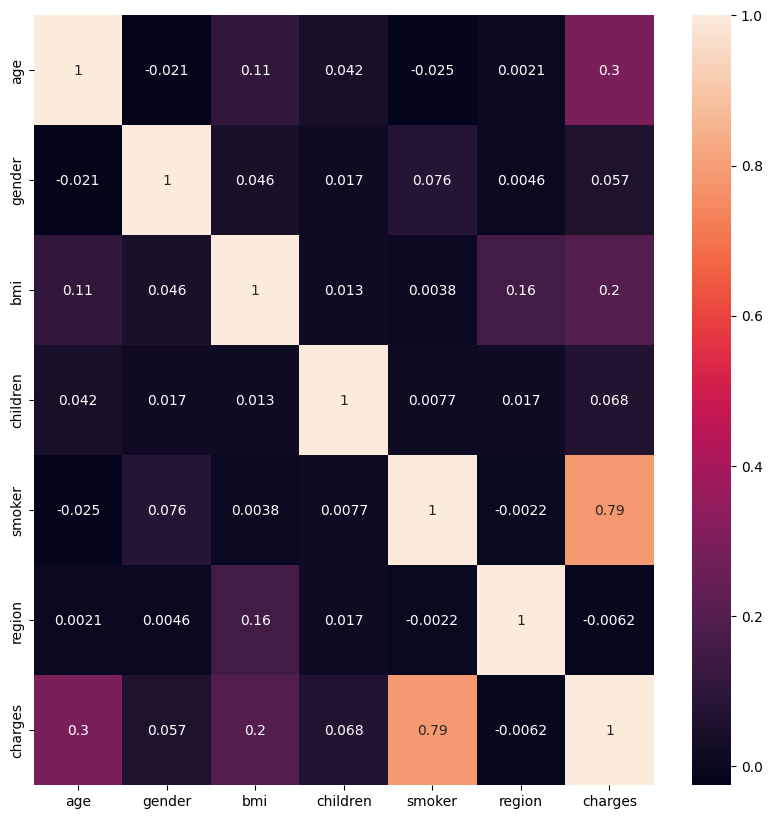

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(), annot=True)
plt.savefig("label-enc")

# Heatmap using One Hot Encoding

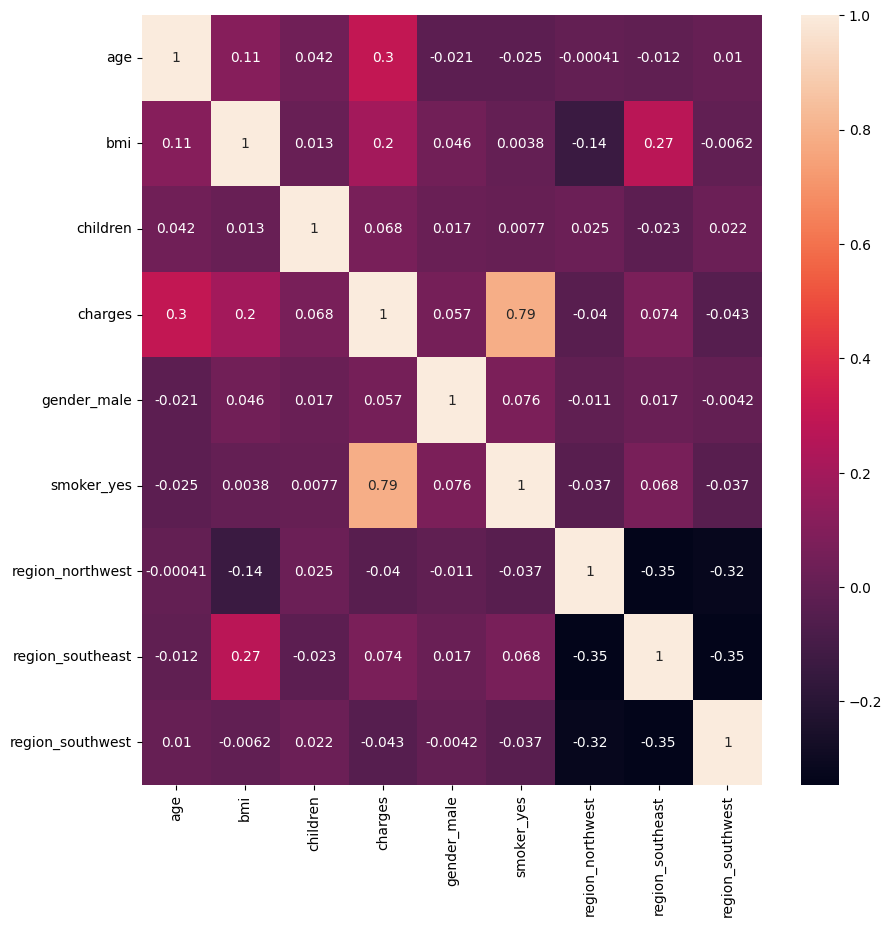

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(df3.corr(), annot=True)
plt.savefig("hot-enc")

In [52]:
# Heatmap using Ordinal Encoding

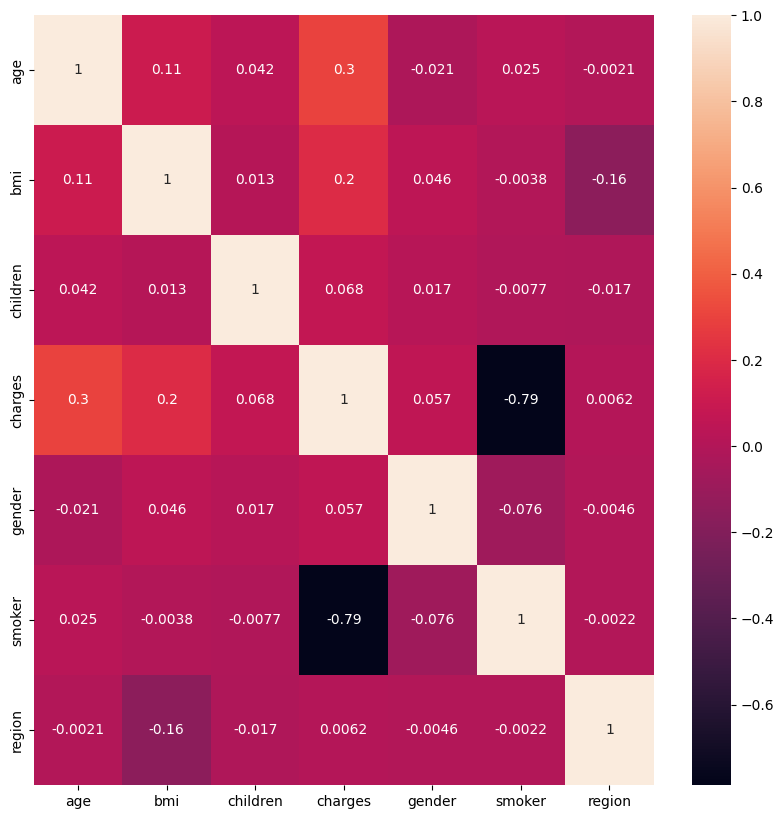

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(df4.corr(), annot=True)
plt.savefig("ordinal-enc")